# OCR with Region


In this example, you will learn how to perform OCR with Region using the MLX-VLM (Vision Language Model) library. 

We will use `Microsoft's Florence-2`, for OCR with Region in images.

## Installation


In [ ]:
pip install -U mlx-vlm

## Import Dependencies

In [ ]:
from mlx_vlm import load, generate
import mlx.core as mx
from PIL import Image

## Florence-2

In [ ]:
model_id = 'mlx-community/Florence-2-base-ft-8bit'
model, processor = load(model_id, {"trust_remote_code": True})

## OCR with Region

In [3]:
prompt = "<OCR_WITH_REGION>"
image = "images/menu.webp"


In [4]:
generated_text = generate(model, processor, image, prompt, temp=0.8, max_tokens=100000, verbose=True)
image = Image.open(image)
parsed_answer = processor.post_process_generation("".join(generated_text) + "</s>", task=prompt, image_size=(image.width, image.height))

Image: images/menu.webp 

Prompt: <OCR_WITH_REGION>
<s>BORCELE<loc_171><loc_81><loc_389><loc_80><loc_390><loc_105><loc_171><loc_106>Coffee Shop<loc_98><loc_139><loc_397><loc_140><loc_396><loc_191><loc_97><loc_189>MENU<loc_109><loc_196><loc_530><loc_195><loc_531><loc_272><loc_109><loc_273>COFFEE<loc_146><loc_370><loc_316><loc_372><loc_315><loc_396><loc_145><loc_395>Espresso<loc_156><loc_422><loc_259><loc_423><loc_258><loc_439><loc_155><loc_438>5<loc_454><loc_424><loc_488><loc_424><loc_489><loc_437><loc_455><loc_437>Macchiato<loc_570><loc_422><loc_687><loc_422><loc_688><loc_439><loc_570><loc_440>5<loc_872><loc_422><loc_901><loc_423><loc_899><loc_438><loc_871><loc_437>Double Espresso<loc_156><loc_443><loc_341><loc_444><loc_341><loc_461><loc_155><loc_460>$5<loc_455><loc_441><loc_489><loc_440><loc_488><loc_459><loc_454><loc_458>Flat White<loc_568><loc_443><loc_683><loc_444><loc_682><loc_461><loc_568><loc_460>$5<loc_869><loc_445><loc_902><loc_445><loc_901><loc_459><loc_868><loc_458>Latte<loc

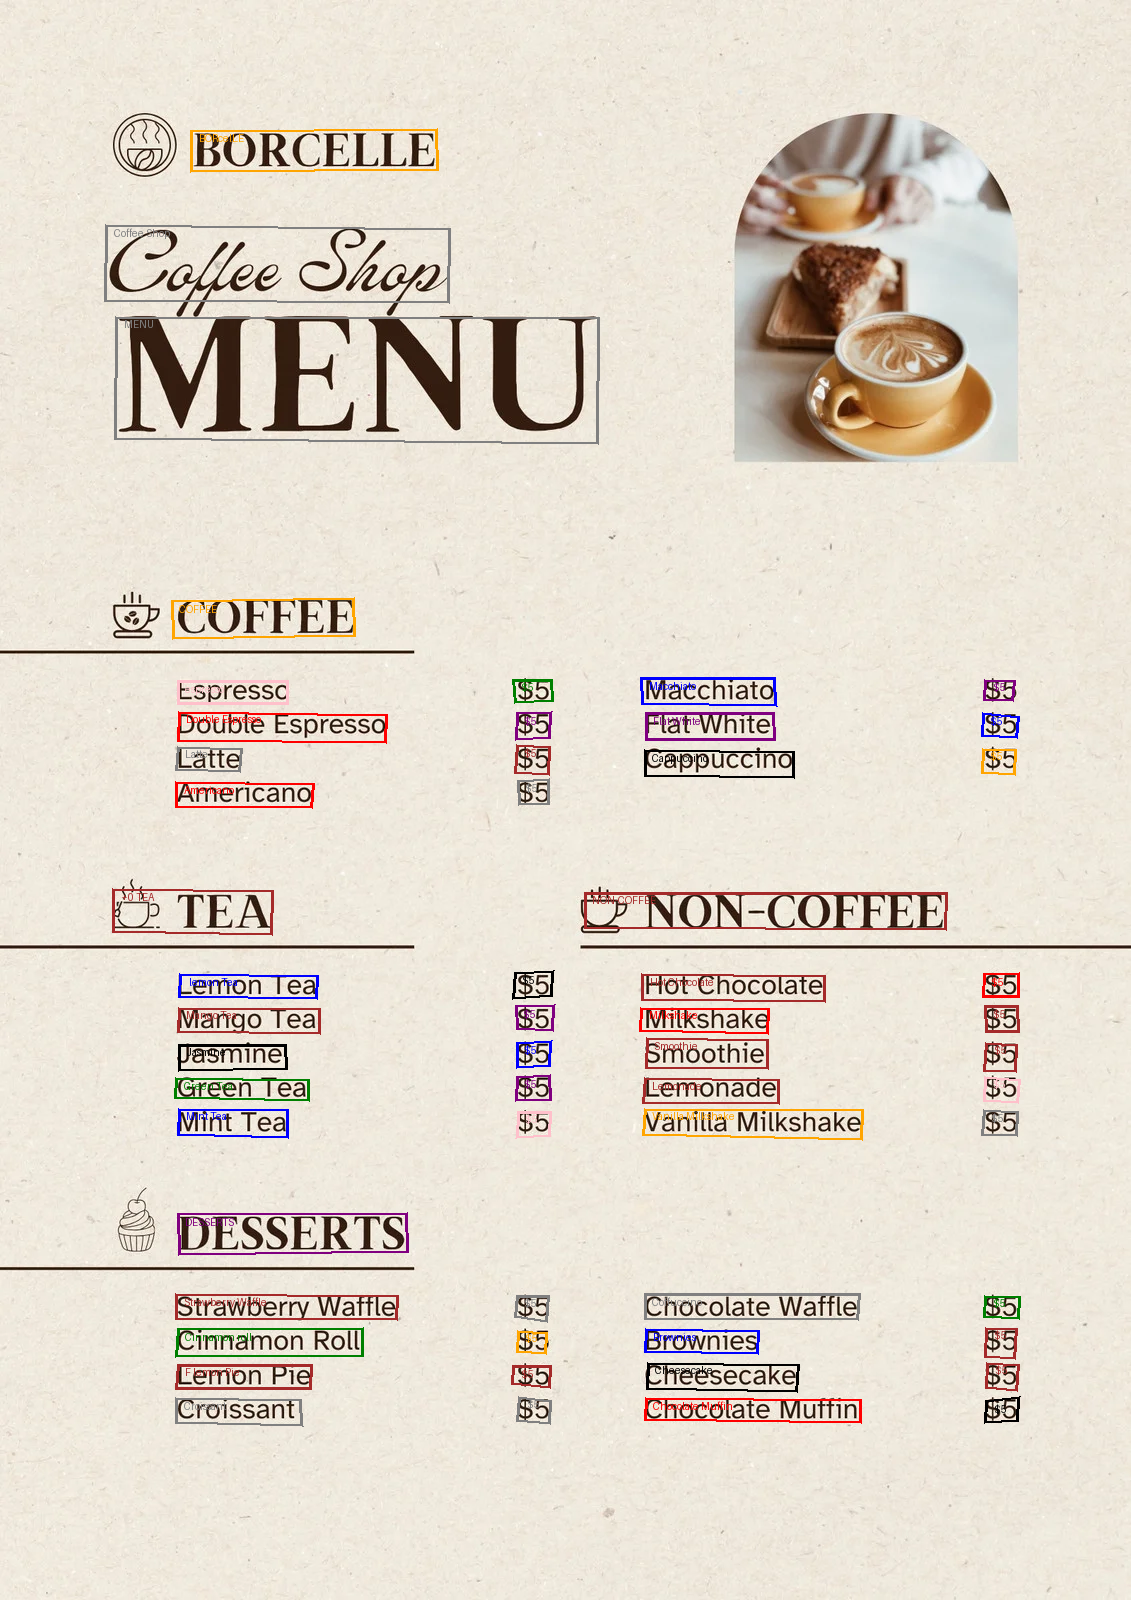

In [7]:
import random
import numpy as np
from PIL import ImageDraw

colormap = ['red', 'blue', 'green', 'gray', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']
def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)

    display(image)


draw_ocr_bboxes(image, parsed_answer["<OCR_WITH_REGION>"])